In [1]:
import pandas as pd

In [2]:
# Specifying the file path
file_path = "reviews.csv"

# Loading the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Displaying the DataFrame
print(df)

                                   reviewId               userName  \
0      0197c118-5c6f-4a7b-894c-970023d1a350                Mar Zur   
1      94868fb5-a21d-4ef9-ab85-81b2ed3d0785           Devin Rivera   
2      825da34e-f65d-4ef3-991d-02d5291820d6          Heidi Kinsley   
3      a49c2875-651a-4c33-b79c-5813780d659e          Daniel Keller   
4      9482c75e-2e63-46ab-8c94-47273dd6a829          A Google user   
...                                     ...                    ...   
16782  e9cebff8-82ad-4191-b196-127a65e9036d  Alexandra Grafwallner   
16783  ab74c21c-3587-4393-a53d-4cb55f3e3c9b          Ljubica Pejic   
16784  0062b15d-6e4d-4f0a-9ea6-ef9b9420d923         Kamiyah Dorsey   
16785  85318bf2-7ca0-4d5e-8cb2-f0f18c813e4d         Keturah Pender   
16786  8e2deadd-1a6a-4817-89dc-4bd9a198332c    Bhagwan Singh Virik   

                                               userImage  \
0      https://play-lh.googleusercontent.com/a/ACg8oc...   
1      https://play-lh.googleuserconten

In [3]:
# Storing the 'content' column in the 'content' variable

content = df['content']

In [4]:
content

0        I have the same recurring tasks to do every da...
1        Instead of shopping around, I downloaded Any.d...
2        Why does every once in a while... out of the b...
3        Terrible Update! This app used to be perfect f...
4        This app is deceivingly terrible. There are so...
                               ...                        
16782                                        Excellent app
16783    I love it. Easy to use. Make my life organize....
16784    I love how I could make plans and check the ap...
16785                             Exactly what I needed!!!
16786                                          Very good 👍
Name: content, Length: 16787, dtype: object

# Data Preprocessing

## Converting to lowercase

In [5]:
content = content.str.lower()


print(content)                                          # Displaying the updated data after converting to lowercase

0        i have the same recurring tasks to do every da...
1        instead of shopping around, i downloaded any.d...
2        why does every once in a while... out of the b...
3        terrible update! this app used to be perfect f...
4        this app is deceivingly terrible. there are so...
                               ...                        
16782                                        excellent app
16783    i love it. easy to use. make my life organize....
16784    i love how i could make plans and check the ap...
16785                             exactly what i needed!!!
16786                                          very good 👍
Name: content, Length: 16787, dtype: object


## Removing Links

In [6]:
import re
# Using re module
# Defining a function to remove links 
def remove_links(text):
    url_pattern = r'https?://\S+|www\.\S+'              # Defining the regular expression pattern that matches with URLs
    return re.sub(url_pattern, '', text)                # Substituting the URLs with an empty string


content = content.apply(remove_links)                   # Applying the remove_links function to the 'content'


print(content)                                          # Displaying the updated data with no links


0        i have the same recurring tasks to do every da...
1        instead of shopping around, i downloaded any.d...
2        why does every once in a while... out of the b...
3        terrible update! this app used to be perfect f...
4        this app is deceivingly terrible. there are so...
                               ...                        
16782                                        excellent app
16783    i love it. easy to use. make my life organize....
16784    i love how i could make plans and check the ap...
16785                             exactly what i needed!!!
16786                                          very good 👍
Name: content, Length: 16787, dtype: object


## Remove next lines

In [7]:
content = content.str.replace('\n', '')                 # Replacing newline characters with an empty string


print(content)                                          # Displaying the updated data

0        i have the same recurring tasks to do every da...
1        instead of shopping around, i downloaded any.d...
2        why does every once in a while... out of the b...
3        terrible update! this app used to be perfect f...
4        this app is deceivingly terrible. there are so...
                               ...                        
16782                                        excellent app
16783    i love it. easy to use. make my life organize....
16784    i love how i could make plans and check the ap...
16785                             exactly what i needed!!!
16786                                          very good 👍
Name: content, Length: 16787, dtype: object


## Removing words containing numbers

In [8]:

content = content.apply(lambda x: re.sub(r'\b\w*\d\w*\b', '', x)) 
# The regular expression r'\b\w*\d\w*\b' matches words that contain at least one digit within them.
# These are replaced with an empty string

print(content)                                          # Display the updated data


0        i have the same recurring tasks to do every da...
1        instead of shopping around, i downloaded any.d...
2        why does every once in a while... out of the b...
3        terrible update! this app used to be perfect f...
4        this app is deceivingly terrible. there are so...
                               ...                        
16782                                        excellent app
16783    i love it. easy to use. make my life organize....
16784    i love how i could make plans and check the ap...
16785                             exactly what i needed!!!
16786                                          very good 👍
Name: content, Length: 16787, dtype: object


## Removing extra spaces

In [9]:
# Defining a function to remove extra spaces
def remove_extra_spaces(text):
    return re.sub(r'\s+', ' ', text).strip() 

# The regular expression pattern r'\s+' matches with whitespace characters
# These are replaced with an empty string

# Applying the remove_extra_spaces function to the content 
content = content.apply(remove_extra_spaces)


print(content)                                          # Displaying the updated data


0        i have the same recurring tasks to do every da...
1        instead of shopping around, i downloaded any.d...
2        why does every once in a while... out of the b...
3        terrible update! this app used to be perfect f...
4        this app is deceivingly terrible. there are so...
                               ...                        
16782                                        excellent app
16783    i love it. easy to use. make my life organize....
16784    i love how i could make plans and check the ap...
16785                             exactly what i needed!!!
16786                                          very good 👍
Name: content, Length: 16787, dtype: object


## Removing Special Characters

In [10]:
content= content.apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))
# The regular expression r'[^a-zA-Z0-9\s]' matches any character that is not a letter 
# These are replaced with an empty string



print(content)                                         # Displaying the updated data


0        i have the same recurring tasks to do every da...
1        instead of shopping around i downloaded anydo ...
2        why does every once in a while out of the blue...
3        terrible update this app used to be perfect fo...
4        this app is deceivingly terrible there are som...
                               ...                        
16782                                        excellent app
16783    i love it easy to use make my life organize i ...
16784    i love how i could make plans and check the ap...
16785                                exactly what i needed
16786                                           very good 
Name: content, Length: 16787, dtype: object


## Removal of Stop words

### 1.Using nltk

In [11]:
import nltk
from nltk.corpus import stopwords


# nltk.download('stopwords')                          # Downloading the stopwords corpus


stop_words = set(stopwords.words('english'))
content = content.apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))
# iterating over each word in the text (x.split())
# keeping only those words that are not in the set of stop words (word.lower() not in stop_words)



print(content)                                        # Displaying the updated data


0        recurring tasks every day need todolist remind...
1        instead shopping around downloaded anydo widel...
2        every blue app asks update acct emails everyth...
3        terrible update app used perfect planning cert...
4        app deceivingly terrible really nice design fe...
                               ...                        
16782                                        excellent app
16783    love easy use make life organize love way put ...
16784    love could make plans check app almost everyda...
16785                                       exactly needed
16786                                                 good
Name: content, Length: 16787, dtype: object


### 2.Using gensim

In [12]:
from gensim.parsing.preprocessing import remove_stopwords

# Removing stop words from the 'content'
content = content.apply(lambda x: remove_stopwords(x))


print(content)                                         # Displaying the updated data


0        recurring tasks day need todolist reminder buz...
1        instead shopping downloaded anydo widely setti...
2        blue app asks update acct emails task list los...
3        terrible update app perfect planning certain t...
4        app deceivingly terrible nice design features ...
                               ...                        
16782                                        excellent app
16783    love easy use life organize love way photos lo...
16784                   love plans check app everyday love
16785                                       exactly needed
16786                                                 good
Name: content, Length: 16787, dtype: object


## Stemming

In [13]:
from nltk.stem import PorterStemmer


# nltk.download('punkt')                              # Downloading NLTK resources 

porter = PorterStemmer()                              # initializing a PorterStemmer object 

content = content.apply(lambda x: ' '.join([porter.stem(word) for word in x.split()]))
# iterating over each word in the text (x.split()), applying stemming using porter.stem(word)



print(content)                                        # Displaying the updated data


0        recur task day need todolist remind buzz time ...
1        instead shop download anydo wide set day sched...
2        blue app ask updat acct email task list lost t...
3        terribl updat app perfect plan certain task co...
4        app deceivingli terribl nice design featur lik...
                               ...                        
16782                                            excel app
16783    love easi use life organ love way photo locat ...
16784                    love plan check app everyday love
16785                                         exactli need
16786                                                 good
Name: content, Length: 16787, dtype: object


## Lemmatization

In [14]:
from nltk.stem import WordNetLemmatizer


# nltk.download('punkt')                                 # Downloading NLTK resources  
# nltk.download('wordnet')
# nltk.download('omw-1.4')


lemmatizer = WordNetLemmatizer()                         # initializing a WordNetLemmatizer object

content = content.apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in nltk.word_tokenize(x)]))
# iterating over each word in the text (x.split()), applying lemmatization using lemmatizer.lemmatize(word).



print(content)                                           # Displaying the updated data


0        recur task day need todolist remind buzz time ...
1        instead shop download anydo wide set day sched...
2        blue app ask updat acct email task list lost t...
3        terribl updat app perfect plan certain task co...
4        app deceivingli terribl nice design featur lik...
                               ...                        
16782                                            excel app
16783    love easi use life organ love way photo locat ...
16784                    love plan check app everyday love
16785                                         exactli need
16786                                                 good
Name: content, Length: 16787, dtype: object


## Data after preprocessing

In [15]:
content

0        recur task day need todolist remind buzz time ...
1        instead shop download anydo wide set day sched...
2        blue app ask updat acct email task list lost t...
3        terribl updat app perfect plan certain task co...
4        app deceivingli terribl nice design featur lik...
                               ...                        
16782                                            excel app
16783    love easi use life organ love way photo locat ...
16784                    love plan check app everyday love
16785                                         exactli need
16786                                                 good
Name: content, Length: 16787, dtype: object

## Word Cloud

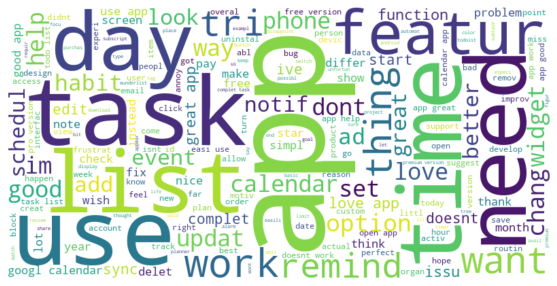

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenating all text data into a single string
text = ' '.join([str(text) for text in content])

# Creating a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Displaying the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Plotting

### Word Frequency Histogram:

Plotting a histogram of word frequencies to visualize the distribution of word occurrences in the text data.

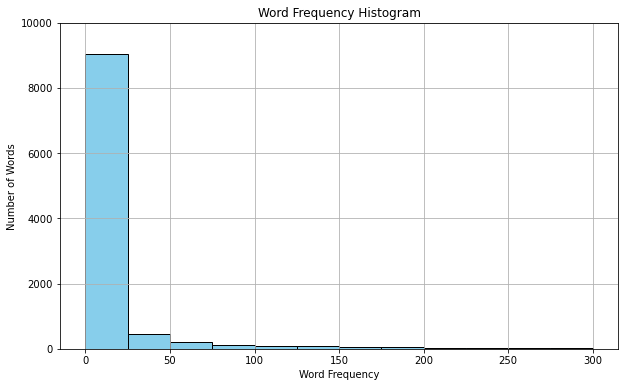

In [17]:
from collections import Counter

# Tokenizing the preprocessed text
tokens = ' '.join(content).split()  

# Calculating word frequencies
word_freq = Counter(tokens)

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(word_freq.values(), bins=range(0, 301, 25), color='skyblue', edgecolor='black')
plt.xlabel('Word Frequency')
plt.ylabel('Number of Words')
plt.title('Word Frequency Histogram')
plt.grid(True)

# Setting the y-axis limits
plt.ylim(0, 10000)                                   # Adjusting the upper limit as needed

plt.show()


### Top N Most Common Words

Plotting a bar chart showing the top N most common words in the text data.
It visualizes the frequency of the most frequently occurring words in the text data


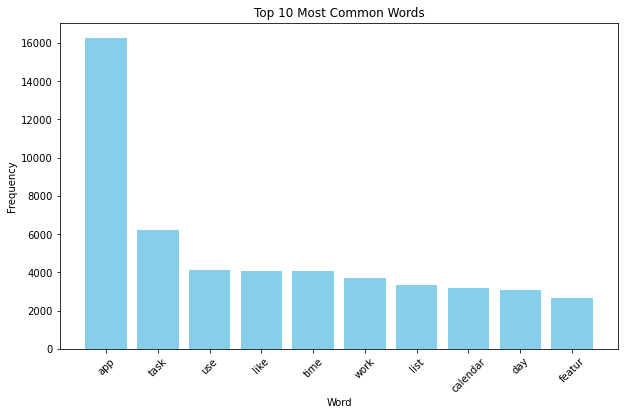

In [18]:
from collections import Counter

# Tokenizing the preprocessed text
tokens = ' '.join(content).split()  

# Calculating word frequencies
word_freq = Counter(tokens)

# Getting the top N most common words
top_n_words = word_freq.most_common(10)  # We can change 10 to any desired number of words

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar([word[0] for word in top_n_words], [word[1] for word in top_n_words], color='skyblue')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words')
plt.xticks(rotation=45)
plt.show()

## Lexicon based Sentiment Analysis

Using the sentiment analysis tool VADER (Valence Aware Dictionary and sEntiment Reasoner)

In [19]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


# Creating a SentimentIntensityAnalyzer instance
analyzer = SentimentIntensityAnalyzer()

# Function to classify text based on compound score
def classify_sentiment(text):
    score = analyzer.polarity_scores(text)["compound"]
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

# Applying the sentiment classification function to the preprocessed text data
content_sentiment = content.apply(classify_sentiment)


print(content_sentiment)                                # Displaying the classified sentiment results


0        Negative
1        Positive
2        Negative
3        Positive
4         Neutral
           ...   
16782    Positive
16783    Positive
16784    Positive
16785     Neutral
16786    Positive
Name: content, Length: 16787, dtype: object


In [20]:
# Looping through all indexes and printing formatted output with text and it's sentiment
for index in range(len(content)):
    text = content.iloc[index]  # Get text by index
    sentiment = content_sentiment.iloc[index]  # Get sentiment by index
    print(f"{index}: {text}: {sentiment}")

0: recur task day need todolist remind buzz time problem app remind time start drift day give differ time day annoy fail screw im go better app ill let guy know updat suggest work app drift move: Negative
1: instead shop download anydo wide set day schedul taken coupl minut app seemingli random day week entri occas pick day year away minut fight app final schedul spent minut tri notif work luck fortun uninstal took second: Positive
2: blue app ask updat acct email task list lost time list went list awhil list lost time frustrat spend time new list cld spend time find app use especi reoccur disappoint: Negative
3: terribl updat app perfect plan certain task complet interfac easi understand plan day futur want perfectli broken date add task regardless need complet app say today complet elimin use app plan futur: Positive
4: app deceivingli terribl nice design featur like home screen widget nice user experi trash pop doesnt turn day wait turn phone alert app turn phone block app notif im 

1323: liter wont open attempt instal older version: Neutral
1324: guy remind pay wall valu spread sheet visual chang app difficult navig definit like old todoist coupl year ago better app chang worst: Negative
1325: ungood: Neutral
1326: understand support develop app paywal featur basic featur like time base remind paywal render app useless trial: Positive
1327: log randomli password input doesnt work password manag pretti useless want jot quick item: Negative
1328: favorit todo app butcher death pointless featur redesign make total unreli tool high product peopl: Negative
1329: ive figur app dont understand work wish enter list goal want obtain list thing need shown schedul week approv mayb bit complex definit simpler app abl schedul paid extra premium help: Positive
1330: work minut screen went black app stop work: Negative
1331: garbag: Neutral
1332: notif work: Neutral
1333: download login googl keep say wait wont login great job todoist team: Negative
1334: app best normal instal

2529: said free day trial deduct account: Positive
2530: bad: Negative
2531: sastifi featur premium version tri refund hour purchas googl refus refund dissapoint purchas: Neutral
2532: music tri watch minut tutori bam loud music turn forget thing know bam music didnt chanc tri app anymor: Negative
2533: unfortun way transfer offlin list phone: Neutral
2534: ticktick awesom googl calendar sync consist deal breaker need: Neutral
2535: fact length entri chang hour default subscrib ridicul expens servic make free version doa id use googl calendar: Neutral
2536: remind work slove issu asp: Neutral
2537: notif detect samsung wearabl app notif watch small problem solv: Negative
2538: use great app doesnt work miss task week: Positive
2539: tierd forev wait fix old reliabl googl task like app unrestrict batteri internet access task remind late dont come show new notif instead show task bodi add lock view mode default task list view task prevent accident mistouch: Negative
2540: yearli subscrip

3822: discov app doesnt work offlin track updat vacat travel im enjoy app help track nutrit health habit figur set goal happen certain number time week let pick specif day like happen time week doesnt matter day: Positive
3823: love concept app start crash doesnt work io android tri fix problem uninstal reinstal app didnt work ive manag use pc origin start wrong app shouldnt: Negative
3824: ui unintuit game guid terribl final hit level click select class popup vanish there place app select class im super bum stat page stat select class doesnt indic class id app star wasnt: Positive
3825: need wifidata play friend nice use wifi data limit ammout data brain memori time home day ive forgotten habit point mute gave extra star love bit art: Positive
3826: thing lack crucial aspect mobil abl check item list complet basic function miss baffl particularli see day there new announc cosmet event complet irrelev assum intend purpos app: Negative
3827: love app major except constantli lose track s

5322: idk im miss app background make sen whatsoev edit chang permiss expect: Negative
5323: thing like alarm finish plant love itif set tha alarmpleas tell: Positive
5324: great app dont know issu devic get notif session: Positive
5325: id love app star pro user issu notif show time isnt correct imposs like timer set complet throw doesnt app unus love whitelist featur annoy know tree complet open app: Negative
5326: like app earli tester origin came year ago came come long way huge gripe deal breaker what point break function break end current session break break allow continu tree sure bug desper need fix: Positive
5327: like ui suggest design app manner minimis possibl tri open app possibl till timer end focu app take entir screen app access like clock ensur app access incorpor higher rate take: Positive
5328: mix feel app hand think effect give odd kind motiv minut ill tree forest thing somewhat bother set timer exampl minut actual focus minut tree focus tree worth caught look phon

6821: good starter app collect data need better daili life limit flexibl free version suffici basic track selfimprov effort easi start cute remind encourag featur easi toggl: Positive
6822: app work pretti user forum arent manag remain use habit tracker crash annoy habit chang ui focu time launch app fortun easi navig: Negative
6823: simpl use like set yesno habit rep like time day hangup free version allow track habit bonu get start dont want overwhelm: Positive
6824: app help track habit creat new better habbit week drink water candi snack like habit track app work hell track work put forth good job: Positive
6825: love app far valuabl complaint atm check day widget: Positive
6826: pro best habit track app give possibl option need set track habit nice ui con id like font bold kind hard cost premium version way high wouldnt spend month habit app dont spend video stream app option like month month year: Positive
6827: best habit tracker best possibl substanti thought succumb shell euro

8037: app send notif disturb turn notif insid app doesnt work uninstal attend meet event pixel: Negative
8038: use pay widget tick reason want app like app offer free: Positive
8039: worth doesnt multipl time day chang habit initi setup interfac pain better: Positive
8040: want purchas premium notic issu track habit chang set habit chang minimum time featur statist doesnt updat: Positive
8041: like app nice remind open app wouldnt need remind rememb open app ahahahha solv consid go premium point: Positive
8042: fine need abl creat task repeat bi weekli specif thursday there way creat task like move app: Positive
8043: app ok past incorrect use everyday word word context abl stand see error time add new task habit look fix: Negative
8044: notif come ye notif set phone app open app notif come uplat wish work properli: Positive
8045: stop auto renew googl play store app set like app want tri month unsubscrib habit staff repli thank: Positive
8046: star complet useless premium dont suggest

9213: ad multipl account support forc log repeatedli day resync account frustrat good bit day away cell wifi coverag mean im unabl access app add new task frustrat elimin benefit app app need abl function offlin constantli need sync: Positive
9214: wish kept wunderlist app instead perfect issu app compar wunderlist fix new item ad instead ad option chang quick choic option remind time quick add bar type search bar box instead click button set appli list dont individu chang list option add list main screen click list: Positive
9215: stay away love wunderlist chang dev move wunderlist todo enhanc experi broken countless featur current gripe remind dont consist remind time recur alert final kick today nightli remind work half time im defect soon suitabl: Positive
9216: say easili frustratin download bought wunderlist replac offer experi good replac sort reorder list automat see task day miss boat thesuggest featur button nightmar login new page attitud here way chang chang app: Positive
9

11105: love doesnt sync googl calendar half event: Positive
11106: great app bug remov remind event add remind chang mind: Positive
11107: great app doesnt sync samsung remind remind sync automat nativ calendar app: Positive
11108: awesom way look way go spend time: Neutral
11109: great app love similair garmin watch: Positive
11110: use represent schedul day respons easi use: Neutral
11111: perfect hope center smartwatch custom exampl daili step instead time date ring progress step goal instead batteri charg statu like integr googl tasksor sectograph includ task manag: Positive
11112: good app track need improv there shortcut mark task complet event task calendar view doesnt strike day view notificationalarm sound alert dismiss remind: Positive
11113: like concept execut regret use use calendar event remind task busi wish work nice todo list actual use phone audibl alarm ye hold need coupl differ thing calendar nice adapt app good luck: Positive
11114: download wrote descript task clo

12819: good app complaint use widget show day event task list day eventsappoint week dont need know schedul quickli abl look task quickli abl check widget super use featur id perfect: Positive
12820: honestli love planner combin cute happi planner function googl calendar plu coupl small gripe overal love accident paid version trial total unintent absolut regret: Positive
12821: im free trial love sync calendar way space task list need thing wish hope abil choos pre set task list base need home mainten household chore help: Positive
12822: wonder app love look like actual planner close perfect wish month week view option add color border particular day repres reoccur event green border friday mean payday similar equal import option shade background day input text pastel blue background tue wed repres oncal day: Positive
12823: far im like ive want abl use calendar paper planner awhil app separ app calendar journal meal plan app adapt certain featur task area journal thing miss abl forma

14389: easi use customis bright colour: Positive
14390: best: Positive
14391: fan directli link calendar want separ app track differ set calendar want calendar share googl use googl calendar turn view calendar app turn googl calendar like concept tab unsync googl useless: Positive
14392: sync doesnt work properli microsoft calendar anymor great make useless new appoint ad outlook calendar doesnt remind dont duplic entri: Positive
14393: screen ad ruin ive busi calendar wouldnt buy click ad screen ad practic unus dev come stock free version ad respons duh ad didnt pay app upfront cost high like corner ad forc screen uninstal star: Positive
14394: ok app better default app came phone lot issu organ task event automat alphabet tell dont want notif chang set add random notif set recur monthli task click move differ day month reliabl switch paper calend easier view organ: Positive
14395: updat event prior gone delet event certain time im troubl duplic event pop calendar respond email custom

15818: nice look app albeit sync googl calendar cross platform certainli yr: Positive
15819: good app ad latest updat includ ridicul annoy ad frequent crash: Negative
15820: love app updat updat gibberish day terribl like phone tablet fix depend planner: Positive
15821: make autocopi task delet show annoy: Negative
15822: intuit way switch week day month view: Neutral
15823: hope widget abl smaller especi task ill love time abl task: Positive
15824: daili event task disappear stay googl calendar app gone: Negative
15825: everytim type task word get mess type task add date select get changedpush date: Negative
15826: love app recent ask multipl time premium pack witch need pay baciss premium pack: Positive
15827: best planner app ive far hate pay yearli id buy time: Neutral
15828: paid app think user control option better app free friend: Positive
15829: sign daili schedul refus sign time dont time uninstal app: Neutral
15830: request permiss begin thingsnot comfort upfront: Positive
15